In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Reading the csv file

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
#Descriptive Statistics

df.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [4]:
# Check if there are null values

df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
#Checking the datatype of columns
df['Age'].dtype

dtype('int64')

In [6]:
#Checking the datatype of columns
df['Na_to_K'].dtype

dtype('float64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [24]:
# Encoding the text values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initialize the lib

df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])
df['Drug'] = le.fit_transform(df['Drug'])


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


<Axes: >

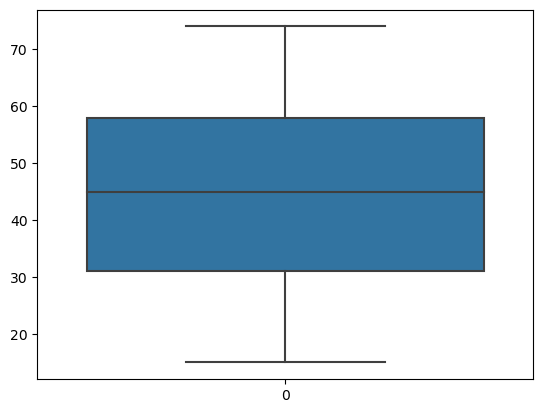

In [26]:
# Visualizing the boxplots for columns

sns.boxplot(df['Age'])

<Axes: >

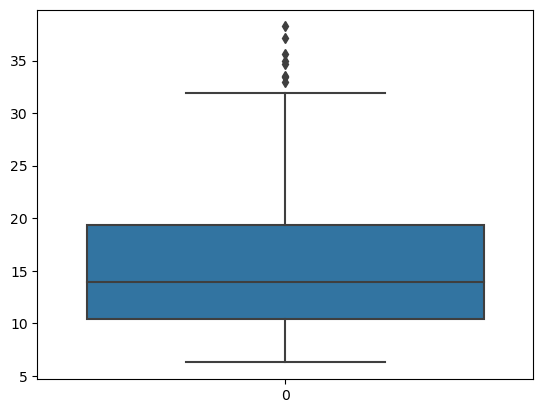

In [27]:
sns.boxplot(df['Na_to_K'])

<Axes: >

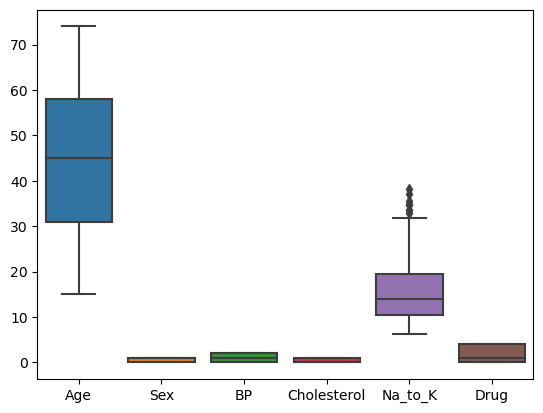

In [28]:
sns.boxplot(df)

In [29]:
#Splitting the labels from the data

X = df.iloc[:,:-1]
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [30]:
y = df['Drug']
y

0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int32

In [109]:
# Split training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=44)

In [16]:
X.shape, y.shape

((200, 5), (200,))

In [17]:
X_train.shape, y_train.shape

((160, 5), (160,))

In [18]:
X_test.shape, y_test.shape

((40, 5), (40,))

In [110]:
# Encoding the text values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() # initialize the lib

X_train['Sex'] = le.fit_transform(X_train['Sex'])
X_train['BP'] = le.fit_transform(X_train['BP'])
X_train['Cholesterol'] = le.fit_transform(X_train['Cholesterol'])
y_train = le.fit_transform(y_train)

X_test['Sex'] = le.transform(X_test['Sex'])
X_test['BP'] = le.transform(X_test['BP'])
X_test['Cholesterol'] = le.transform(X_test['Cholesterol'])
y_test = le.transform(y_test)


In [140]:
# ANN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, input_dim=5, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [141]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [131]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 120)               720       
                                                                 
 dense_64 (Dense)            (None, 85)                10285     
                                                                 
 dense_65 (Dense)            (None, 50)                4300      
                                                                 
 dense_66 (Dense)            (None, 20)                1020      
                                                                 
 dense_67 (Dense)            (None, 5)                 105       
                                                                 
Total params: 16,430
Trainable params: 16,430
Non-trainable params: 0
_________________________________________________________________


In [142]:
#Fit the model

model.fit(X_train,y_train,epochs=10,batch_size=5,validation_data=(X_test,y_test))

Epoch 1/10
32/32 [==============================] - 1s 10ms/step - loss: 1.8052 - accuracy: 0.2375 - val_loss: 1.4334 - val_accuracy: 0.4000
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 1.3877 - accuracy: 0.4938 - val_loss: 1.3655 - val_accuracy: 0.4000
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 1.2820 - accuracy: 0.4750 - val_loss: 1.1608 - val_accuracy: 0.5750
Epoch 4/10
32/32 [==============================] - 0s 3ms/step - loss: 1.1185 - accuracy: 0.5750 - val_loss: 1.0564 - val_accuracy: 0.5750
Epoch 5/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0883 - accuracy: 0.5500 - val_loss: 0.9821 - val_accuracy: 0.6500
Epoch 6/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0827 - accuracy: 0.5625 - val_loss: 1.0043 - val_accuracy: 0.6500
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 1.0755 - accuracy: 0.5562 - val_loss: 1.0368 - val_accuracy: 0.6500
Epoch 8/10
32/32 [=

In [143]:
y_pred = model.predict(X_test)
y_pred

2/2 [==============================] - 0s 3ms/step


array([[5.81362583e-02, 7.76067898e-02, 2.75326848e-01, 1.04296379e-01,
        4.84633684e-01],
       [8.85159254e-01, 4.15517502e-02, 6.04930846e-03, 1.89578645e-02,
        4.82818037e-02],
       [8.73538911e-01, 5.08693419e-02, 9.51140095e-03, 2.01161634e-02,
        4.59642261e-02],
       [9.12194312e-01, 3.48915532e-02, 5.70549257e-03, 1.57563444e-02,
        3.14522348e-02],
       [5.34004509e-01, 1.33518457e-01, 7.21734166e-02, 8.54227543e-02,
        1.74880892e-01],
       [3.62348646e-01, 1.55077383e-01, 9.47996378e-02, 1.21367082e-01,
        2.66407132e-01],
       [7.20366761e-02, 9.58089158e-02, 2.88259745e-01, 1.15062349e-01,
        4.28832293e-01],
       [1.80415362e-01, 1.39637083e-01, 1.30900696e-01, 1.55925483e-01,
        3.93121362e-01],
       [3.01236957e-01, 1.42574370e-01, 7.28445202e-02, 1.23472430e-01,
        3.59871745e-01],
       [2.81202972e-01, 1.61805063e-01, 1.88984498e-01, 1.24047205e-01,
        2.43960246e-01],
       [9.76493716e-01, 9.7692

In [101]:
y_pred = model.predict([[32,0,0,1,10.292]])
y_pred

1/1 [==============================] - 0s 112ms/step


array([[0.18297784, 0.22607525, 0.15571937, 0.14348386, 0.29174367]],
      dtype=float32)

In [102]:
y_pred = np.argmax(y_pred)
y_pred

4

In [103]:
output = [0,1,2,3,4]
output[y_pred]

4

In [144]:
y_p = []
for x in y_pred:
    x = np.argmax(x)
    y_p.append(output[x])
y_p

[4,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 4,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0]

In [145]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_p, y_test)
cm

array([[16,  0,  2,  0,  4],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       [ 0,  1,  3,  3, 11]], dtype=int64)

In [146]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_p, y_test)
acc

0.675

In [67]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
138,51,1,0,1,11.343
46,37,0,0,0,13.091
118,32,0,0,1,10.292
85,59,1,0,0,13.935
110,50,1,0,0,7.490
...,...,...,...,...,...
131,52,1,1,1,32.922
59,34,1,0,0,18.703
173,41,0,1,1,18.739
163,21,0,0,1,28.632


In [68]:
y_train

array([2, 1, 1, 2, 1, 0, 4, 0, 4, 0, 3, 4, 1, 2, 4, 4, 4, 4, 0, 0, 2, 3,
       0, 0, 4, 3, 0, 4, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 4, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 4, 4, 4, 0, 4, 1, 4, 0, 0, 4, 0, 4, 0, 1, 0, 0, 3,
       0, 0, 3, 1, 4, 0, 1, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4,
       0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 1, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 0,
       3, 4, 0, 0, 2, 1, 0, 1, 4, 0, 0, 0, 3, 0, 4, 4, 1, 0, 4, 0, 4, 4,
       4, 2, 0, 0, 0, 1, 0, 0, 4, 1, 4, 3, 0, 1, 0, 4, 1, 3, 2, 0, 3, 3,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [119]:
y_train

array([2, 1, 1, 2, 1, 0, 4, 0, 4, 0, 3, 4, 1, 2, 4, 4, 4, 4, 0, 0, 2, 3,
       0, 0, 4, 3, 0, 4, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 4, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 4, 4, 4, 0, 4, 1, 4, 0, 0, 4, 0, 4, 0, 1, 0, 0, 3,
       0, 0, 3, 1, 4, 0, 1, 4, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4,
       0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 1, 0, 0, 3, 4, 3, 4, 0, 0, 0, 0, 0,
       3, 4, 0, 0, 2, 1, 0, 1, 4, 0, 0, 0, 3, 0, 4, 4, 1, 0, 4, 0, 4, 4,
       4, 2, 0, 0, 0, 1, 0, 0, 4, 1, 4, 3, 0, 1, 0, 4, 1, 3, 2, 0, 3, 3,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [125]:
y_p


[4,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 0,
 4,
 4,
 0,
 4,
 4,
 4,
 4,
 0,
 0,
 0,
 4,
 4,
 0,
 0,
 4,
 4,
 0,
 0]